In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def imread(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

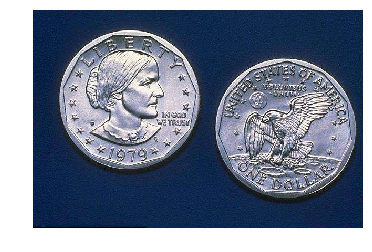

In [2]:
image = imread('./image/coins.jpg')
show(image)

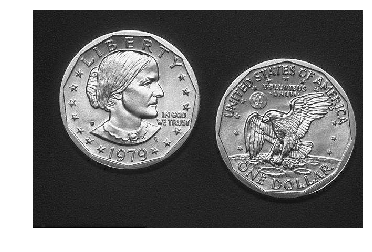

In [3]:
# 将图像转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

### 1、全局阈值的二值化

二值化的几种处理方式：  

- cv2.THRESH_BINARY: 高于阈值的转为最大，低于阈值的转为最小  
- cv2.THRESH_BINARY_INV：高于阈值的转为最小，低于阈值的转为最大  
- cv2.THRESH_TRUNC：高于阈值的按阈值处理，低于阈值的不变  
- cv2.THRESH_TOZERO：高于阈值的被置为0，低于阈值的不变  
- cv2.THRESH_TOZERO_INV：高于阈值的不变，低于阈值的被置为0  
<center><img src="pic/threshold.png" alt="FAO" width="300"></center>

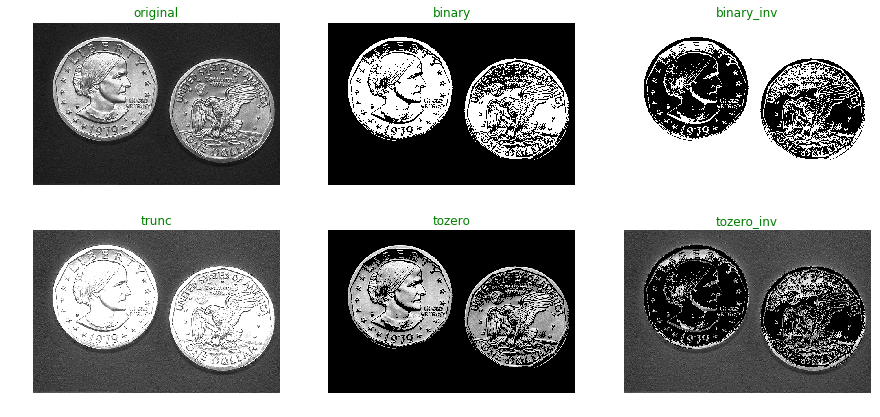

In [4]:
ret1, thresh1 = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY)    
## ret1: 其实就是阈值
ret2, thresh2 = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
ret3, thresh3 = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_TRUNC)
ret4, thresh4 = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_TOZERO)
ret5, thresh5 = cv2.threshold(gray, thresh=127, maxval=255, type=cv2.THRESH_TOZERO_INV)
title = ['original', 'binary', 'binary_inv', 'trunc', 'tozero', 'tozero_inv']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(title[i], color='green')
plt.show()

利用二值化将硬币抠出来（其实就相当于遮挡）

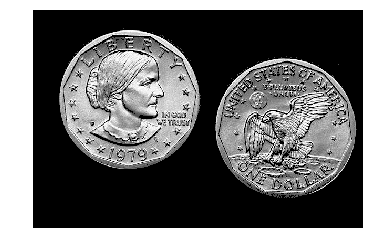

In [5]:
ret1, mask = cv2.threshold(gray, thresh=70, maxval=255, type=cv2.THRESH_BINARY)
rst = cv2.bitwise_and(gray, mask)
plt.imshow(rst, cmap='gray')
plt.axis('off')
plt.show()

#### 1.2 自动选择阈值
将阈值设置为0，并且在参数的后面加上以下代码

    cv2.threshold(... | cv2.THRESH_OTSU)

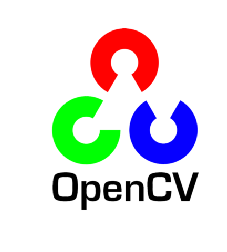

自动选择的阈值为： 164.0


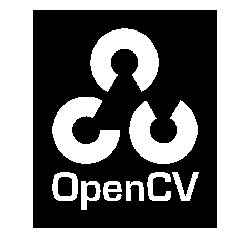

In [6]:
image = imread('./image/opencv_logo.png')
show(image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret1, thresh = cv2.threshold(image, thresh=0, maxval=255, type=cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print('自动选择的阈值为：', str(ret1))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

### 2、自适应阈值Adaptive Thresholding
前面介绍的是全局阈值，但是整幅图都使用一个阈值效果不太好，所以以下介绍自适应阈值。自适应阈值有自适应的平均阈值和自适应的高斯阈值。

##### Adaptive Thresholding指定阈值的计算方法：
- cv2.ADAPTIVE_THRESH_MEAN_C: 取自相邻区域的平均值；
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 取自相邻趋于的加权和，权重为一个高斯窗口  
其中参数Block size: 领域大小；C: 常数，阈值等于（加权）平均值减去这个常数

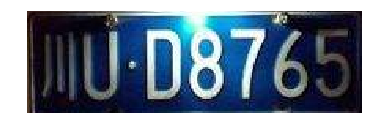

In [7]:
image = imread('./image/license_plate.png')
show(image)

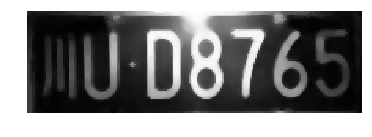

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# 进行一个中值滤波处理，这样得到的效果更好一点
gray = cv2.medianBlur(gray, ksize=5)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
def threshold_vs(image):
    '''各种二值化方法的比较'''
    # 1、全局二值化的BINARY
    ret1, thresh1 = cv2.threshold(image, thresh=0, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # 2、自适应的平均阈值 参数设置如下：
    thresh2 = cv2.adaptiveThreshold(image, maxValue=255, 
                                   adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   thresholdType=cv2.THRESH_BINARY,
                                   blockSize=11,
                                   C=3)
    # 3、自适应的高斯阈值
    thresh3 = cv2.adaptiveThreshold(image, maxValue=255,
                                   adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   thresholdType=cv2.THRESH_BINARY,
                                   blockSize=11,
                                   C=3)
    titles = ['original', 'global threshold', 'adaptive mean threshold', 'adaptive gaussian threshold']
    images = [image, thresh1, thresh2, thresh3]
    plt.figure(figsize=(15,7))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], color='green')
        plt.axis('off')
    plt.show()

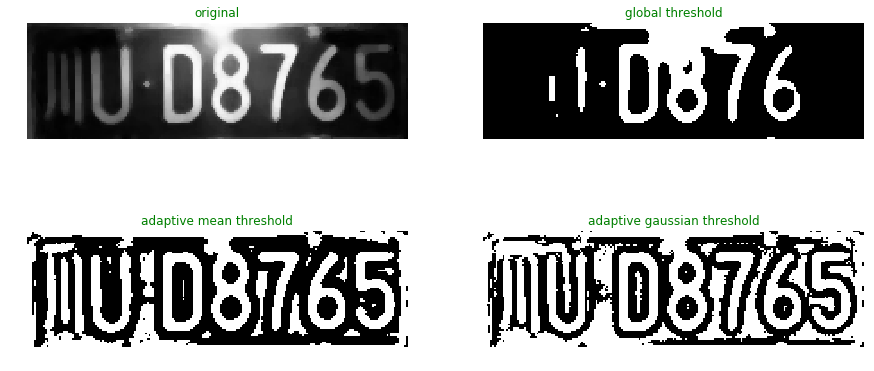

In [10]:
threshold_vs(gray)

通过上面对比，可以发现，全局阈值二值化的效果明显较差，自适应阈值的效果都还不错。

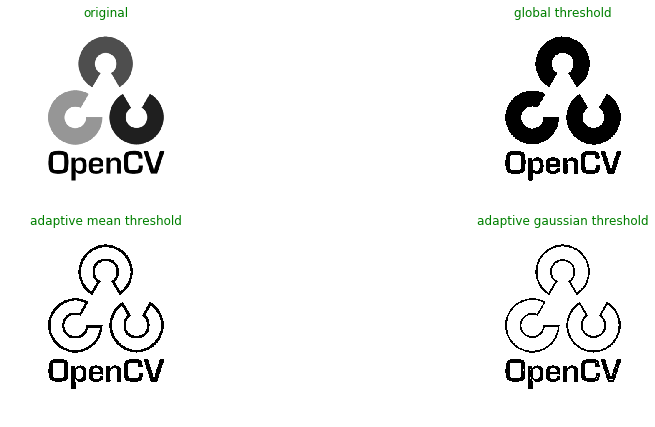

In [11]:
image = imread('./image/opencv_logo.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# gray = cv2.medianBlur(gray, ksize=5)    # 这张图不需要进行中值滤波处理
threshold_vs(gray)

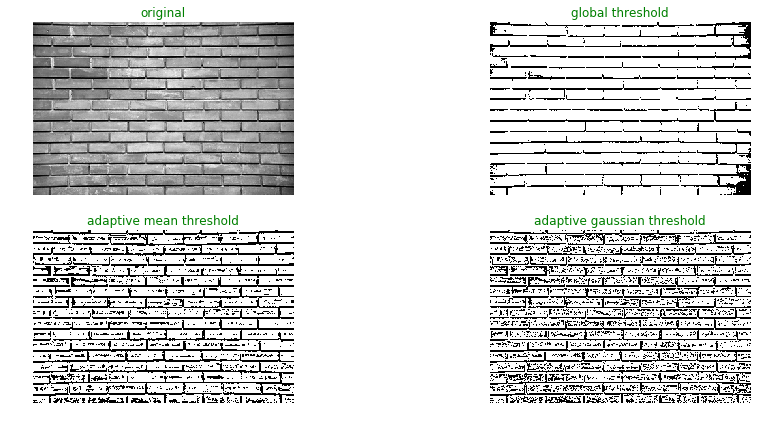

In [12]:
# 对砖墙图进行二值化，并与图像梯度得到的边界图进行比较
image = imread('./image/bricks.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
threshold_vs(image=gray)